# Ejercicio de Regresión Lineal

En este notebook intentaremos predecir el monto de una transacción con Machine Learning segun algunas de sus características.

## Predicción: ¿Cuánto será el valor estimado de una transacción?

Vamos a comenzar por Importar y Visualizar los datos

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#cargamos los datos de entrada
data = pd.read_csv("./fraudTrain.csv")

In [ ]:
#veamos cuantas dimensiones y registros contiene
data.shape

(1296675, 23)

In [ ]:
#son 1,296,675 registros con 23 columnas. Veamos los primeros registros para tener una idea
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Hasta el momento no hemos encontrado en el head valores nulos.

En nuestro caso la columna is_fraud será nuestra salida, es decir nuestro valor "Y", el valor que queremos predecir

In [ ]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


De aqui observamos que el monto máximo que ha tenido una transacción es de $28,948.90.

Así mismo, el valor mínimo de las transacción fue de $1.00.

Y en cuanto a las salidas, vemos que en promedio hay más transacciones verídicas que fraudes.

## Visualización General

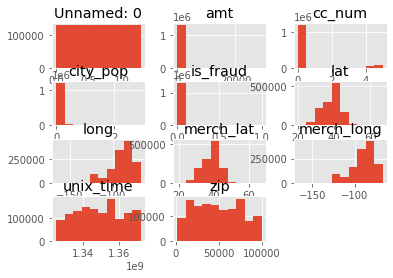

In [ ]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

## Visualizamos Monto de la Transacción vs. Fraudes

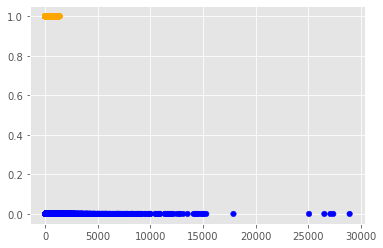

In [ ]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['amt'].values
f2 = data['is_fraud'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Fraudes
asignar=[]
for index, row in data.iterrows():
    if(row['is_fraud']==1):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

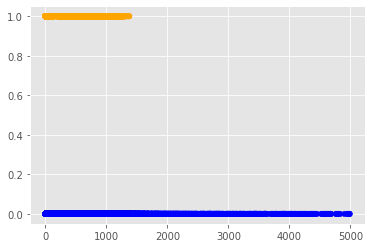

In [ ]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 20,000
filtered_data = data[(data['amt'] <= 5000)]

f1 = filtered_data['amt'].values
f2 = filtered_data['is_fraud'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['is_fraud']==1):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [ ]:
# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06,1.296539e+06
mean,6.483386e+05,4.171932e+17,6.942634e+01,4.880071e+04,3.853768e+01,-9.022646e+01,8.882268e+04,1.349244e+09,3.853740e+01,-9.022660e+01,5.789259e-03
std,3.743181e+05,1.308807e+18,1.239789e+02,2.689321e+04,5.075793e+00,1.375922e+01,3.019555e+05,1.284128e+07,5.109772e+00,1.377124e+01,7.586665e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241705e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473369e+01,-9.689748e+01,0.000000e+00
50%,6.483410e+05,3.521417e+15,4.751000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936569e+01,-8.743836e+01,0.000000e+00
75%,9.725075e+05,4.642255e+15,8.312000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359386e+09,4.195718e+01,-8.023691e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,4.986550e+03,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Regresión Lineal Simple (1 variable)

Vamos a intentar primero una Regresión Lineal con 1 sóla variable

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["amt"]]
X_train = np.array(dataX)
y_train = filtered_data['is_fraud'].values

In [ ]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva generan una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.00017397]
Independent term: 
 -0.006288719712278271
Mean squared error: 0.01
Variance score: 0.08


## Visualizamos la Recta que obtuvimos

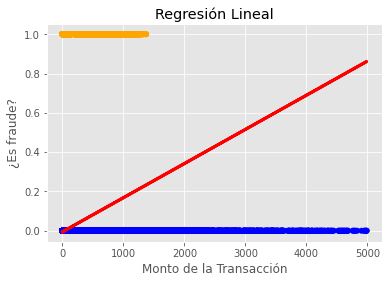

In [ ]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Monto de la Transacción')
plt.ylabel('¿Es fraude?')
plt.title('Regresión Lineal')

plt.show()

### Predicción 1

In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos si es fraudulenta una transacción por un monto de $1000.00,
# según nuestro modelo, hacemos:
y_diez = regr.predict([[1000]])
print(int(y_diez))

0


Como se puede ver, el modelo no "entendió" bien cómo detectar un fraude pero creo que este resultado es muy bueno para analizarlo en el reporte de Word. :)